## Import Packages

In [1]:
import os
import yaml
import pandas as pd
import numpy as np
import scipy.io
import scanpy as sc
import humanfriendly

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor='white')

## Parameters

In [3]:
# this cell is tagged `parameters` and will be overridden by papermill
sample_name = "2090_CS1429a_T_1_CD45pos_citeseq_1_CITE"
path_h5ad = "/test/cite-seq/2090_CS1429a_T_1_CD45pos_citeseq_1_CITE.h5ad"
path_report = "/test/cite-seq/run_report.yaml"
path_read_mtx = "/test/cite-seq/reads/matrix.mtx.gz"
path_outdir = "/test/cite-seq"

## Run Report

In [4]:
!cat $path_report

Date: 2022-03-30
Running time: 17.0 minutes, 2.219 seconds
CITE-seq-Count Version: 1.4.3
Reads processed: 42687903
Percentage mapped: 96
Percentage unmapped: 4
Uncorrected cells: 0
Correction:
	Cell barcodes collapsing threshold: 1
	Cell barcodes corrected: 37951
	UMI collapsing threshold: 1
	UMIs corrected: 40927
Run parameters:
	Read1_filename: /tmp/scratch/dp-lab-gwf-core2/cromwell-execution/CiteSeq/346371c9-ca2d-4de7-a0a5-c320a46e1fe1/call-Preprocess/Preprocess/01ab219c-1d2a-4164-b6b5-b790d3ed0816/call-TrimR1/R1.fastq.gz
	Read2_filename: /tmp/scratch/dp-lab-gwf-core2/cromwell-execution/CiteSeq/346371c9-ca2d-4de7-a0a5-c320a46e1fe1/call-Preprocess/Preprocess/01ab219c-1d2a-4164-b6b5-b790d3ed0816/call-TrimR2/R2.fastq.gz
	Cell barcode:
		First position: 1
		Last position: 16
	UMI barcode:
		First position: 17
		Last position: 28
	Expected cells: 0
	Tags max errors: 2
	Start trim: 0


In [5]:
with open(path_report, "rt") as fin:
    # report file contains tabs
    # run_report = yaml.load(fin, Loader=yaml.FullLoader)        
    run_report = fin.read().replace("\t", "  ")
    run_report = yaml.load(run_report, Loader=yaml.FullLoader)

In [6]:
# num of reads processed
humanfriendly.format_number(run_report["Reads processed"])

'42,687,903'

In [7]:
# percentage mapped
run_report["Percentage mapped"]

96

## Load AnnData

In [8]:
adata = sc.read_h5ad(path_h5ad)

In [9]:
adata.obs

,unmapped,barcode_sequence
cell_barcodes,,
231145152375603,6,CAATACGAGAGCGACT
239460343298477,7,CCTAACCAGACTACGG
195617080392411,5,GATCACACAGGTGTTT
241030051020141,3,CCCTTAGCAAATCGGG
227920871835492,6,CTCAGTCCACAATGAA
...,...,...
129446769248619,15,TGTTGAGAGAGAAGGT
122378460780453,5,TTCACGCAGTGGTCAG
240633706036446,2,CCGGGTACAATTCTTC


In [10]:
adata.var

,feature_name
A0005-ACGAATCAATCTGTG,2D10
A0006-GTCTTTGTCAGTGCA,IT2.2
A0007-GTTGTCCGACAATAC,29E.2A3
A0008-TCAACGCTTGGCTAG,24F.10C12
A0010-GACTGGGAGGGTATT,DCN.70
...,...
A0167-ACTTCCGTCGATCTT,E11
A0214-TCCTTGGATGTACCG,FIB504
A0865-TGATCCGAAGTCGTG,9D9F9
A0072-TGTTCCCGCTCAACT,RPA-T4


## Load Read Counts

In [11]:
mtx = scipy.io.mmread(path_read_mtx)

In [12]:
adata.layers["reads"] = mtx.T.tocsr()[:, :-1]

In [13]:
adata.obs["unmapped_reads"] = mtx.T.toarray()[:, -1]

In [14]:
adata.obs

,unmapped,barcode_sequence,unmapped_reads
cell_barcodes,,,
231145152375603,6,CAATACGAGAGCGACT,88
239460343298477,7,CCTAACCAGACTACGG,41
195617080392411,5,GATCACACAGGTGTTT,44
241030051020141,3,CCCTTAGCAAATCGGG,5
227920871835492,6,CTCAGTCCACAATGAA,58
...,...,...,...
129446769248619,15,TGTTGAGAGAGAAGGT,188
122378460780453,5,TTCACGCAGTGGTCAG,6
240633706036446,2,CCGGGTACAATTCTTC,2


## Read Counts

In [15]:
adata.to_df(layer="reads")

,A0005-ACGAATCAATCTGTG,A0006-GTCTTTGTCAGTGCA,A0007-GTTGTCCGACAATAC,A0008-TCAACGCTTGGCTAG,A0010-GACTGGGAGGGTATT,A0016-ACTCACTGGAGTCTC,A0020-TGATAGAAACAGACC,A0021-TTTAGTGATCCGACT,A0022-ATTCGCCTTACGCAA,A0023-ATCACATCGTTGCCA,...,A0390-GTGTGTTGTCCTATG,A0572-ACAATTTGTCTGCGA,A0147-GTCCCTGCAACTTGA,A0164-TCGAGTCGCTTATCA,A0146-GTCTCTTGGCTTAAA,A0167-ACTTCCGTCGATCTT,A0214-TCCTTGGATGTACCG,A0865-TGATCCGAAGTCGTG,A0072-TGTTCCCGCTCAACT,A0133-CTGTAGCCGCCTATT
cell_barcodes,,,,,,,,,,,,,,,,,,,,,
231145152375603,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,26,0,0,3,0,0
239460343298477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,1
195617080392411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,76,0,0,0,33,0
241030051020141,0,0,0,0,1,0,0,0,0,0,...,0,0,36,0,1,0,0,0,3,0
227920871835492,0,0,0,0,0,0,0,0,0,100,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129446769248619,3,0,0,0,0,0,0,0,0,0,...,2,0,0,1,2,0,0,0,28,0
122378460780453,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,38,0,2,1,0,0
240633706036446,0,0,0,31,0,0,0,0,0,0,...,44,0,0,0,0,0,0,0,0,0


### Matrix vs. Run Report

Note that unmapped reads are excluded.

In [16]:
adata.layers["reads"].sum()

4800722

In [17]:
adata.layers["reads"].sum(), run_report["Reads processed"]

(4800722, 42687903)

In [18]:
adata.layers["reads"].sum() / run_report["Reads processed"] * 100

11.246094707439717

### Total Reads per ADT

In [19]:
adata.var["total_reads"] = adata.layers["reads"].sum(axis=0).A1

In [20]:
adata.var["total_reads"]

A0005-ACGAATCAATCTGTG      3057
A0006-GTCTTTGTCAGTGCA      1506
A0007-GTTGTCCGACAATAC      8611
A0008-TCAACGCTTGGCTAG      7238
A0010-GACTGGGAGGGTATT      8876
                          ...  
A0167-ACTTCCGTCGATCTT      7159
A0214-TCCTTGGATGTACCG     12526
A0865-TGATCCGAAGTCGTG     10743
A0072-TGTTCCCGCTCAACT     30580
A0133-CTGTAGCCGCCTATT    117184
Name: total_reads, Length: 277, dtype: int64

### Total Reads per Celluar Barcode

In [21]:
adata.obs["total_reads"] = adata.layers["reads"].sum(axis=1).A1

In [22]:
adata.obs["total_reads"]

cell_barcodes
231145152375603    2079
239460343298477    1730
195617080392411    1147
241030051020141     978
227920871835492    1177
                   ... 
129446769248619    3958
122378460780453    1538
240633706036446     879
196019733784805     796
241054862953332    1067
Name: total_reads, Length: 4163, dtype: int64

### Zero Rows

In [23]:
np.count_nonzero(adata.obs["total_reads"] == 0)

1

In [24]:
np.count_nonzero(adata.obs["total_reads"] == 0) / adata.shape[0]

0.00024021138601969732

### Overall Stats

In [25]:
adata.to_df(layer="reads").sum(axis=1).describe()

count     4163.000000
mean      1153.188086
std        587.700132
min          0.000000
25%        788.000000
50%       1074.000000
75%       1411.000000
max      11142.000000
dtype: float64

### 95 Percentile

In [26]:
percentile_95 = adata.obs["total_reads"].describe(percentiles=[0.95])["95%"]
percentile_95

2174.5999999999985

In [27]:
adata.to_df(layer="reads")[ adata.obs["total_reads"] > percentile_95 ]

,A0005-ACGAATCAATCTGTG,A0006-GTCTTTGTCAGTGCA,A0007-GTTGTCCGACAATAC,A0008-TCAACGCTTGGCTAG,A0010-GACTGGGAGGGTATT,A0016-ACTCACTGGAGTCTC,A0020-TGATAGAAACAGACC,A0021-TTTAGTGATCCGACT,A0022-ATTCGCCTTACGCAA,A0023-ATCACATCGTTGCCA,...,A0390-GTGTGTTGTCCTATG,A0572-ACAATTTGTCTGCGA,A0147-GTCCCTGCAACTTGA,A0164-TCGAGTCGCTTATCA,A0146-GTCTCTTGGCTTAAA,A0167-ACTTCCGTCGATCTT,A0214-TCCTTGGATGTACCG,A0865-TGATCCGAAGTCGTG,A0072-TGTTCCCGCTCAACT,A0133-CTGTAGCCGCCTATT
cell_barcodes,,,,,,,,,,,,,,,,,,,,,
195548207795101,0,0,0,120,0,0,0,0,0,0,...,0,0,0,0,33,0,136,0,1,52
130675161347822,0,0,1,1,0,14,34,0,0,0,...,0,1,0,0,1,0,0,0,0,1
161942492003174,0,0,28,46,44,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169768861490475,0,0,0,1,0,0,0,0,0,6,...,74,0,0,0,0,0,3,0,2,0
195976649927086,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155914268501917,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,49,0,1,36
191766863924531,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
227905807726500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49


In [28]:
adata.to_df(layer="reads")[ adata.obs["total_reads"] > percentile_95 ].sample(5, random_state=0)

,A0005-ACGAATCAATCTGTG,A0006-GTCTTTGTCAGTGCA,A0007-GTTGTCCGACAATAC,A0008-TCAACGCTTGGCTAG,A0010-GACTGGGAGGGTATT,A0016-ACTCACTGGAGTCTC,A0020-TGATAGAAACAGACC,A0021-TTTAGTGATCCGACT,A0022-ATTCGCCTTACGCAA,A0023-ATCACATCGTTGCCA,...,A0390-GTGTGTTGTCCTATG,A0572-ACAATTTGTCTGCGA,A0147-GTCCCTGCAACTTGA,A0164-TCGAGTCGCTTATCA,A0146-GTCTCTTGGCTTAAA,A0167-ACTTCCGTCGATCTT,A0214-TCCTTGGATGTACCG,A0865-TGATCCGAAGTCGTG,A0072-TGTTCCCGCTCAACT,A0133-CTGTAGCCGCCTATT
cell_barcodes,,,,,,,,,,,,,,,,,,,,,
204359589316843,0,1,0,0,60,0,0,0,0,2,...,0,0,0,0,1,0,0,0,0,98
122436474584499,0,0,0,0,0,0,0,0,182,40,...,1,0,0,0,7,0,0,0,0,0
131106671081269,0,0,0,0,0,0,0,0,0,0,...,0,0,81,0,0,0,0,0,1,86
195634106615653,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,0,7,0,0,33
130598638373099,0,0,29,0,2,0,0,0,25,0,...,2,0,0,0,2,0,0,0,0,84


In [29]:
adata.to_df(layer="reads")[ adata.obs["total_reads"] > percentile_95 ].sample(5, random_state=0).sum(axis=1)

cell_barcodes
204359589316843    2375
122436474584499    2210
131106671081269    2428
195634106615653    3098
130598638373099    2897
dtype: int64

### Histogram (sum of reads across ADTs)

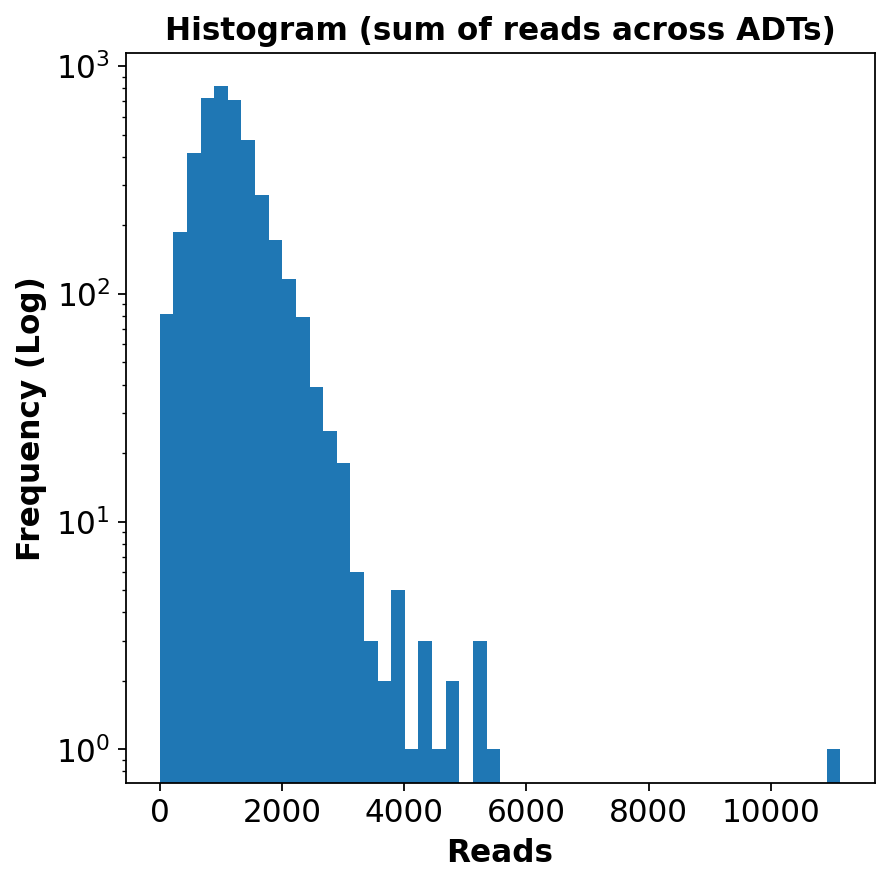

In [30]:
fig, ax = plt.subplots(figsize=(6,6), facecolor="white")

ax.hist(adata.obs["total_reads"].sort_values(ascending=False), bins=50)

ax.set_xlabel("Reads", fontweight="bold")
ax.set_ylabel("Frequency (Log)", fontweight="bold")
ax.set_title("Histogram (sum of reads across ADTs)", fontweight="bold")
ax.grid(b=False)

plt.yscale("log")
plt.show()

### Histogram (sum of reads per ADTs)

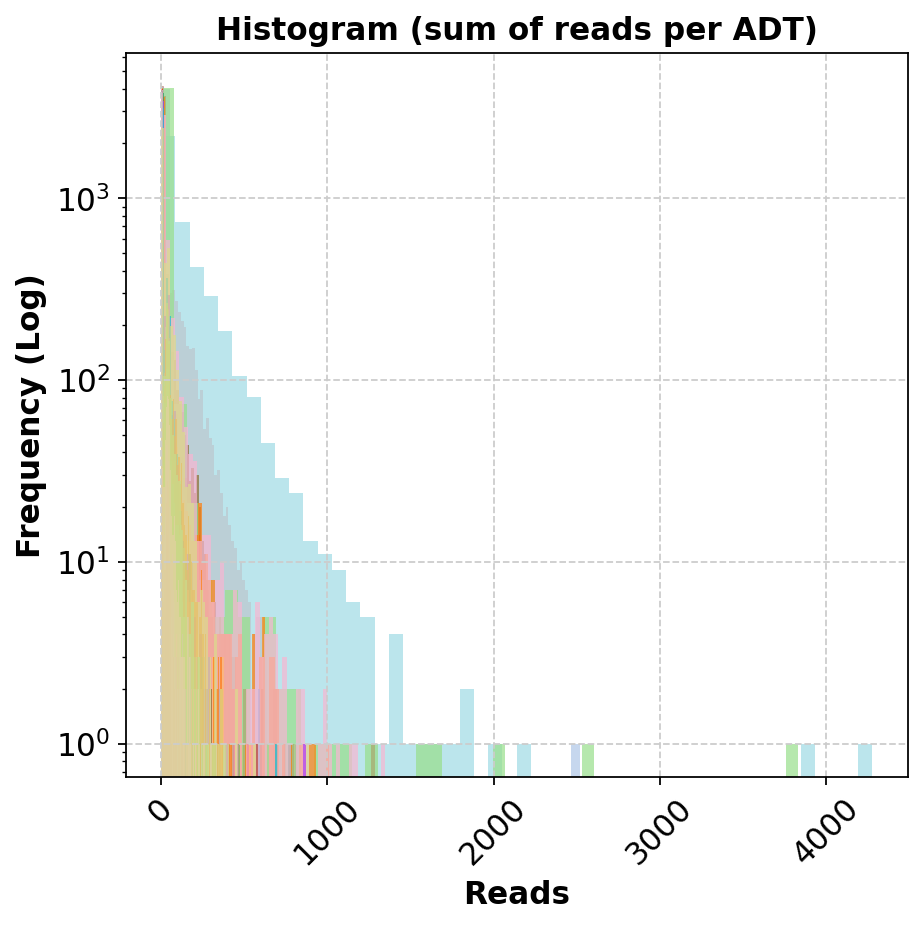

In [31]:
fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")
    
for idx, col in enumerate(adata.var_names):
    
    df_tmp = np.sort(adata.layers["reads"][:, idx].A.ravel())[::-1]

    ax.hist(df_tmp, bins=50, alpha=0.7, label=col)

ax.set_xlabel("Reads", fontweight="bold")
ax.set_ylabel("Frequency (Log)", fontweight="bold")
ax.tick_params(axis="x", rotation=45)
ax.set_title("Histogram (sum of reads per ADT)", fontweight="bold")
ax.grid(b=True, linestyle="--")

plt.yscale("log")
plt.tight_layout()
plt.show()

### Unmapped

In [32]:
adata.obs["unmapped_reads"].sort_values(ascending=False)

cell_barcodes
232250180061485    565
165310986042222    520
135693696874285    500
231358992374700    458
157534901192942    454
                  ... 
235122009226598      0
133837062884662      0
169082591864558      0
199934564513701      0
120726911572908      0
Name: unmapped_reads, Length: 4163, dtype: int64

In [33]:
adata.obs["unmapped_reads"].sum()

188703

### Total vs. Unmapped

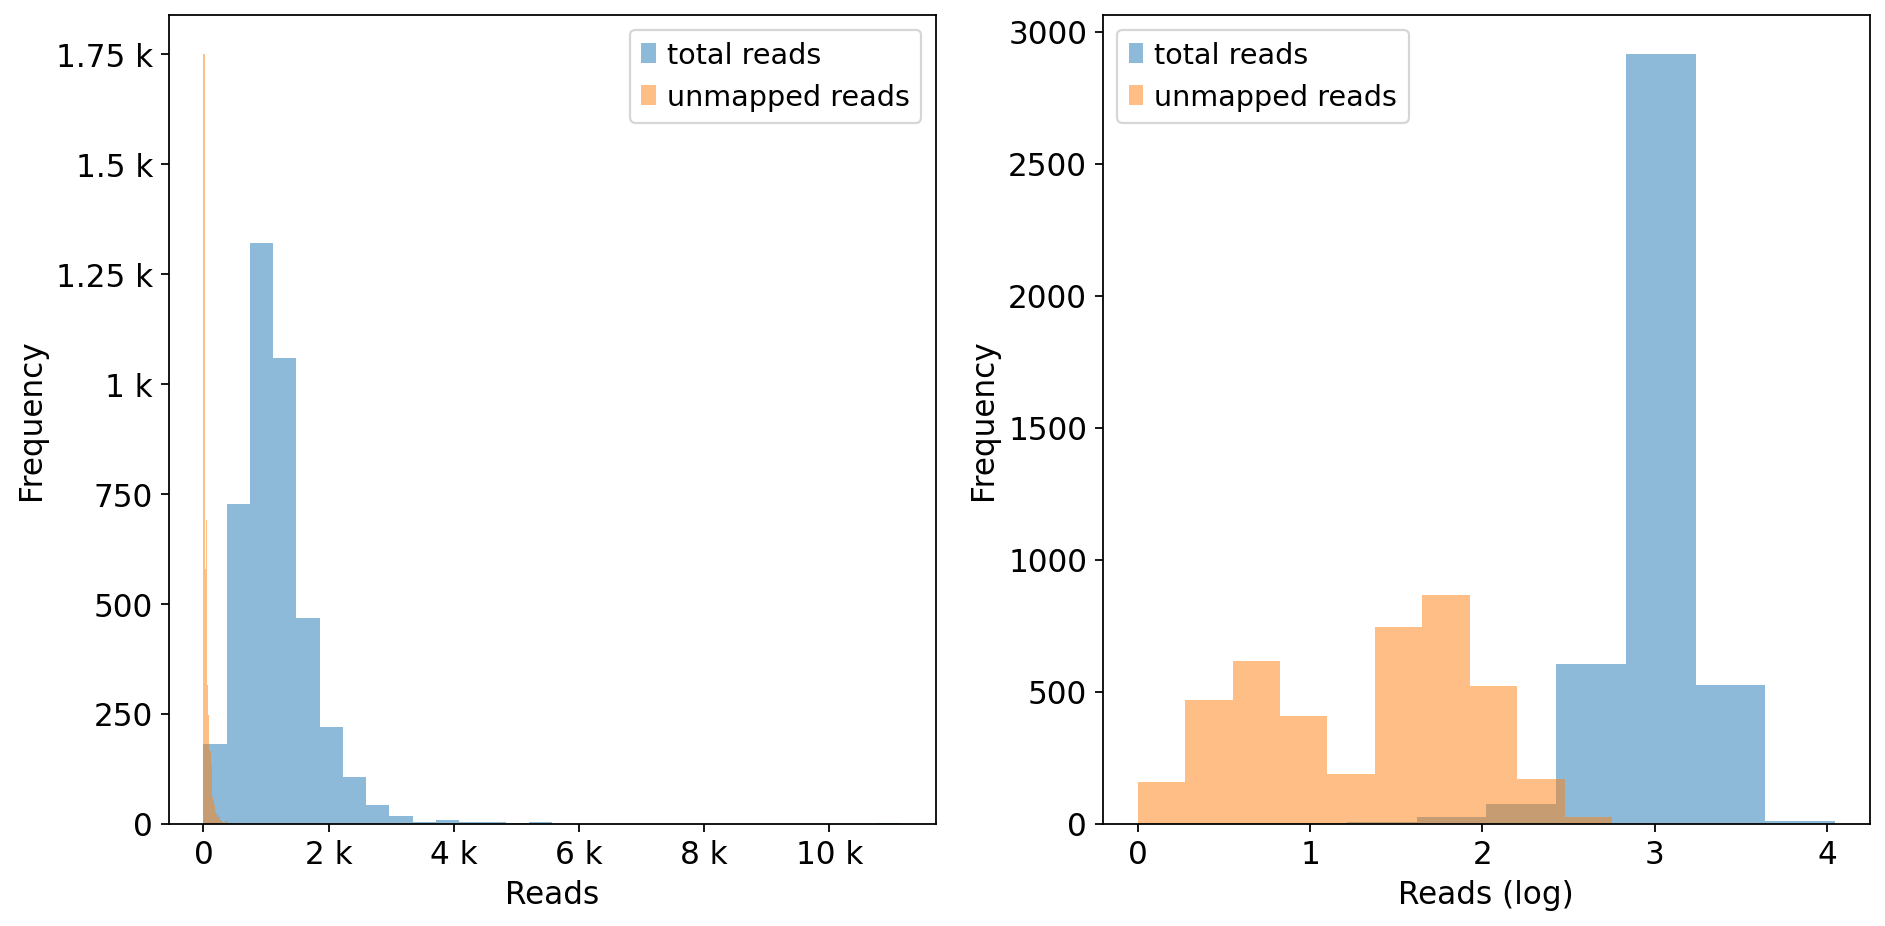

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6), facecolor="white")
ax = np.ravel(ax)

ax[0].hist(adata.obs["total_reads"], bins=30, label="total reads", alpha=0.5)
ax[0].hist(adata.obs["unmapped_reads"], bins=30, label="unmapped reads", alpha=0.5)

ax[0].set_xlabel("Reads")
ax[0].set_ylabel("Frequency")
ax[0].xaxis.set_major_formatter(matplotlib.ticker.EngFormatter())
ax[0].yaxis.set_major_formatter(matplotlib.ticker.EngFormatter())
ax[0].grid(b=False)
ax[0].legend()

ax[1].hist(np.log10(adata.obs["total_reads"] + 1), label="total reads", alpha=0.5)
ax[1].hist(np.log10(adata.obs["unmapped_reads"] + 1), label="unmapped reads", alpha=0.5)

ax[1].set_xlabel("Reads (log)")
ax[1].set_ylabel("Frequency")
ax[1].grid(b=False)
ax[1].legend()

plt.tight_layout()
plt.show()

## UMI Counts

In [35]:
adata.to_df()

,A0005-ACGAATCAATCTGTG,A0006-GTCTTTGTCAGTGCA,A0007-GTTGTCCGACAATAC,A0008-TCAACGCTTGGCTAG,A0010-GACTGGGAGGGTATT,A0016-ACTCACTGGAGTCTC,A0020-TGATAGAAACAGACC,A0021-TTTAGTGATCCGACT,A0022-ATTCGCCTTACGCAA,A0023-ATCACATCGTTGCCA,...,A0390-GTGTGTTGTCCTATG,A0572-ACAATTTGTCTGCGA,A0147-GTCCCTGCAACTTGA,A0164-TCGAGTCGCTTATCA,A0146-GTCTCTTGGCTTAAA,A0167-ACTTCCGTCGATCTT,A0214-TCCTTGGATGTACCG,A0865-TGATCCGAAGTCGTG,A0072-TGTTCCCGCTCAACT,A0133-CTGTAGCCGCCTATT
cell_barcodes,,,,,,,,,,,,,,,,,,,,,
231145152375603,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2,0,0,1,0,0
239460343298477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
195617080392411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,3,0
241030051020141,0,0,0,0,1,0,0,0,0,0,...,0,0,3,0,1,0,0,0,1,0
227920871835492,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129446769248619,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,2,0,0,0,2,0
122378460780453,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,3,0,1,1,0,0
240633706036446,0,0,0,1,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [36]:
# total UMIs per cell barcode
adata.obs["total_umis"] = adata.X.sum(axis=1).A1

### Histogram (sum of UMIs across ADTs)

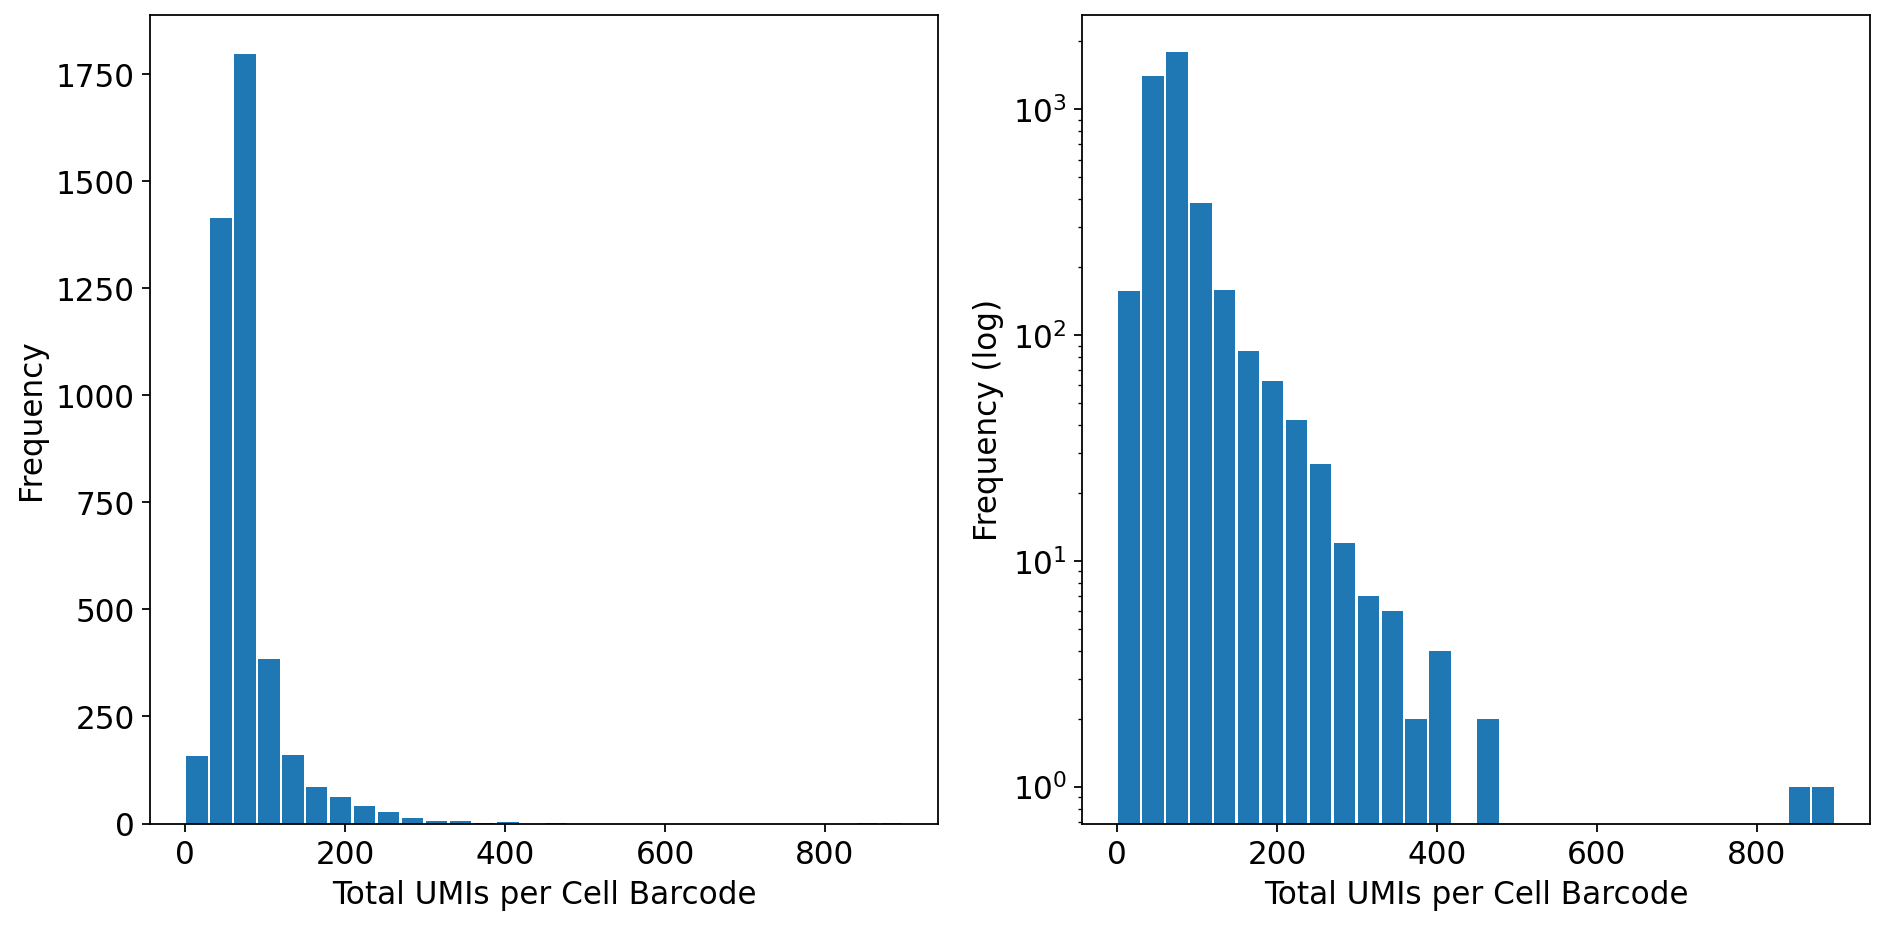

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), facecolor="white")

ax = np.ravel(axes)

ax[0].hist(adata.obs["total_umis"], bins=30, rwidth=0.9)
ax[0].set_xlabel("Total UMIs per Cell Barcode")
ax[0].set_ylabel("Frequency")
ax[0].grid(b=False)

ax[1].hist(adata.obs["total_umis"], bins=30, rwidth=0.9)
ax[1].set_xlabel("Total UMIs per Cell Barcode")
ax[1].set_ylabel("Frequency (log)")
ax[1].set_yscale("log")
ax[1].grid(b=False)

plt.tight_layout()
plt.show()

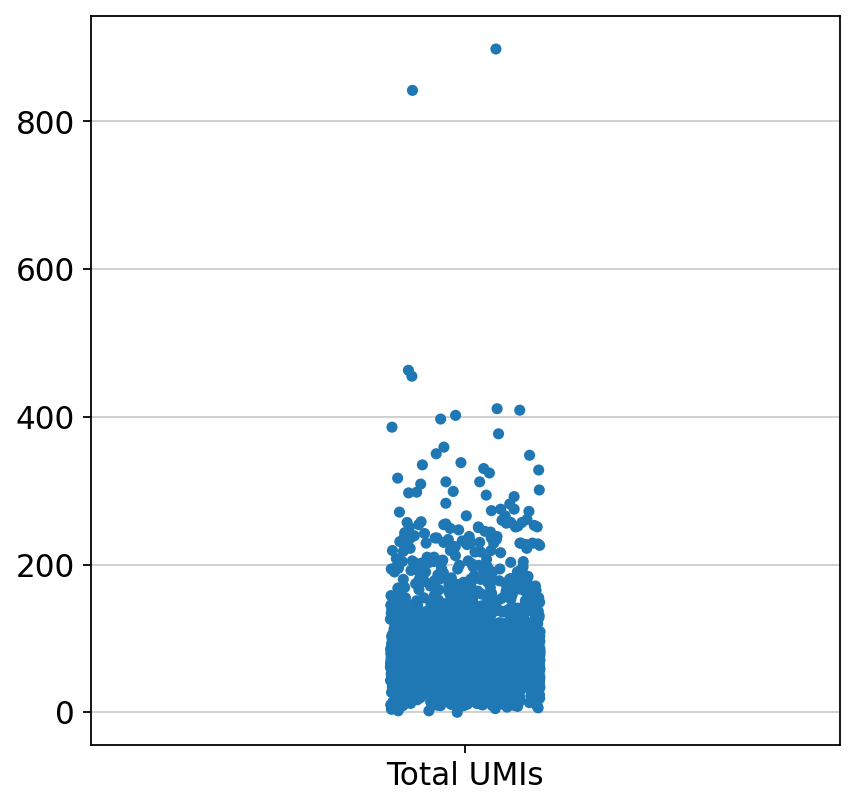

In [38]:
fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")

sns.stripplot(data=adata.obs["total_umis"], ax=ax)

ax.set_xticklabels(["Total UMIs"])

plt.show()

In [39]:
adata.to_df().describe()

,A0005-ACGAATCAATCTGTG,A0006-GTCTTTGTCAGTGCA,A0007-GTTGTCCGACAATAC,A0008-TCAACGCTTGGCTAG,A0010-GACTGGGAGGGTATT,A0016-ACTCACTGGAGTCTC,A0020-TGATAGAAACAGACC,A0021-TTTAGTGATCCGACT,A0022-ATTCGCCTTACGCAA,A0023-ATCACATCGTTGCCA,...,A0390-GTGTGTTGTCCTATG,A0572-ACAATTTGTCTGCGA,A0147-GTCCCTGCAACTTGA,A0164-TCGAGTCGCTTATCA,A0146-GTCTCTTGGCTTAAA,A0167-ACTTCCGTCGATCTT,A0214-TCCTTGGATGTACCG,A0865-TGATCCGAAGTCGTG,A0072-TGTTCCCGCTCAACT,A0133-CTGTAGCCGCCTATT
count,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,...,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000
mean,0.060533,0.017535,0.123228,0.081432,0.153015,0.071343,0.123469,0.025222,0.101369,0.073264,...,0.465289,0.025462,0.107134,0.031948,0.917127,0.168388,0.266154,0.213788,0.714148,0.889503
std,0.253161,0.148450,0.378984,0.310552,0.450727,0.281502,0.383632,0.165756,0.351841,0.297618,...,0.855731,0.159062,0.508982,0.185199,1.412548,0.801992,0.667625,0.487156,1.049454,1.121539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,3.000000,4.000000,5.000000,6.000000,5.000000,4.000000,3.000000,6.000000,4.000000,...,8.000000,2.000000,8.000000,2.000000,15.000000,11.000000,6.000000,4.000000,9.000000,23.000000


## Reads per UMI

### Calculate

In [40]:
# reads divided by UMI, replace NaN with zero
reads_per_umi = np.nan_to_num(adata.layers["reads"] / adata.X)

In [41]:
pd.DataFrame(reads_per_umi)

,0,1,2,3,4,5,6,7,8,9,...,267,268,269,270,271,272,273,274,275,276
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,13.000000,0.0,0.0,3.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,25.333333,0.0,0.0,0.0,11.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12.0,0.0,1.000000,0.0,0.0,0.0,3.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4158,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,14.0,0.0
4159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,12.666667,0.0,2.0,1.0,0.0,0.0
4160,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.333333,0.0,0.0,0.0,10.0,0.0


In [42]:
adata.obs["total_umis"].sum()

315694

In [43]:
adata.obs["total_reads"].sum()

4800722

In [44]:
avg_reads_per_umi= adata.obs["total_reads"].sum() / adata.obs["total_umis"].sum()
avg_reads_per_umi

15.206883881226757

### Histogram

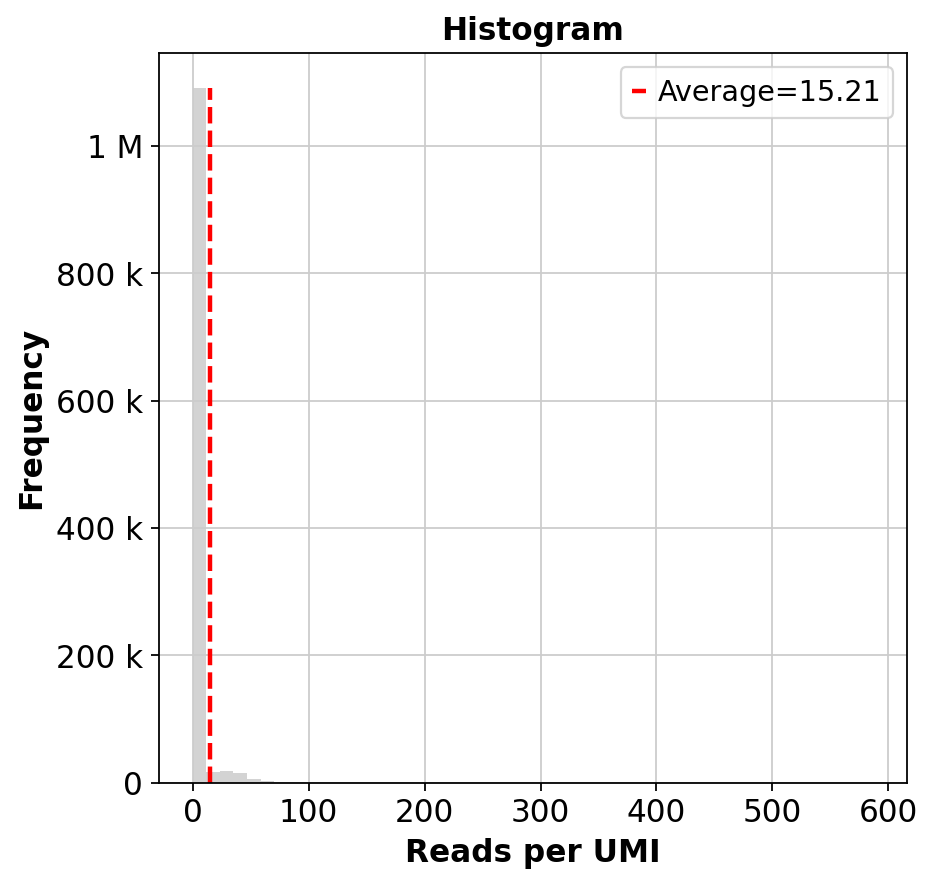

In [45]:
fig, ax = plt.subplots(figsize=(6,6), facecolor="white")

n, bins, _ = ax.hist(reads_per_umi.A1, bins=50, color="lightgray")
ax.vlines(
    x=avg_reads_per_umi,
    ymin=0, ymax=np.max(n),
    color="red", linestyle="--", lw=2,
    label=f"Average={avg_reads_per_umi:.2f}"
)

ax.set_xlabel("Reads per UMI", fontweight="bold")
ax.set_ylabel("Frequency", fontweight="bold")
ax.yaxis.set_major_formatter(matplotlib.ticker.EngFormatter())
ax.set_title("Histogram", fontweight="bold")
ax.legend()

plt.show()

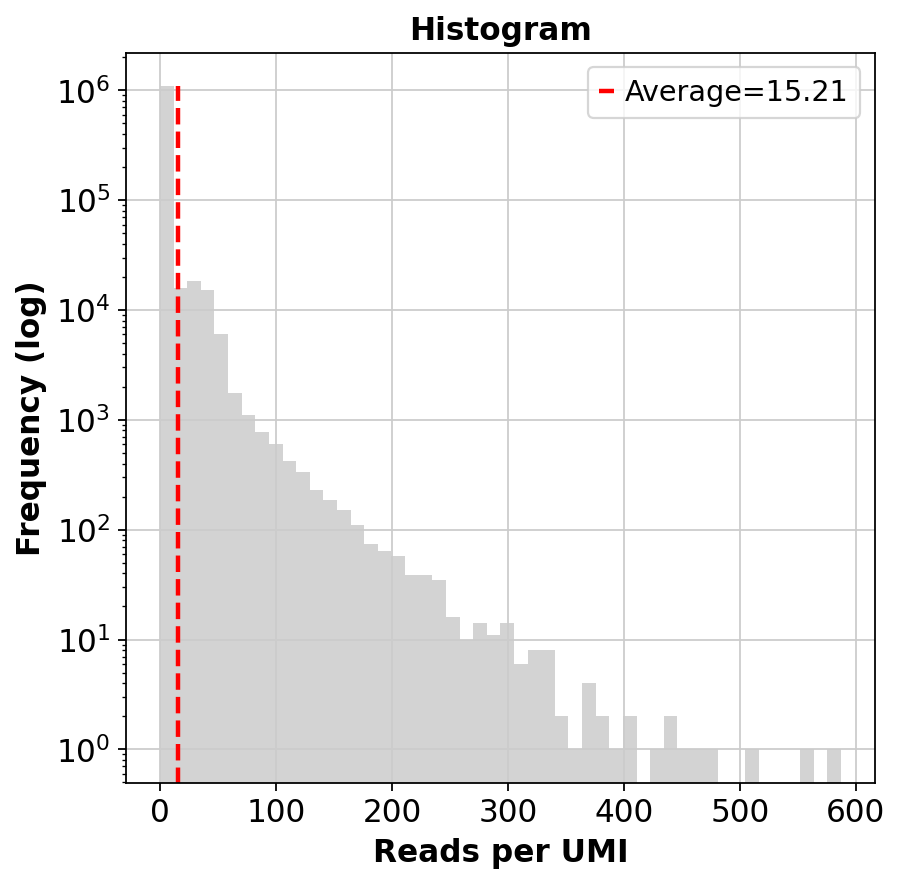

In [46]:
fig, ax = plt.subplots(figsize=(6,6), facecolor="white")

n, bins, _ = ax.hist(reads_per_umi.A1, bins=50, color="lightgray")
ax.vlines(
    x=avg_reads_per_umi,
    ymin=0, ymax=np.max(n),
    color="red", linestyle="--", lw=2,
    label=f"Average={avg_reads_per_umi:.2f}"
)

ax.set_xlabel("Reads per UMI", fontweight="bold")
ax.set_ylabel("Frequency (log)", fontweight="bold")
ax.set_title("Histogram", fontweight="bold")
ax.legend()

plt.yscale("log")
plt.show()

## Write adata to Disk

In [47]:
adata

AnnData object with n_obs × n_vars = 4163 × 277
    obs: 'unmapped', 'barcode_sequence', 'unmapped_reads', 'total_reads', 'total_umis'
    var: 'feature_name', 'total_reads'
    layers: 'reads'

In [48]:
adata.write(os.path.join(path_outdir, f"{sample_name}.QC.h5ad"))